In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
import numpy as np

def normalize_feature(feature, max_samples, value_repeat=None):
    last_feature = len(feature) - 1
    while last_feature < max_samples:
        if value_repeat == None:
            repeated_feature = feature[last_feature]
        else:
            repeated_feature = value_repeat
        feature.append(repeated_feature)
        last_feature += 1

def normalize_samples(scores, max_samples):
    normalized_scores = scores.copy()
    for precisions, recalls in normalized_scores:
        normalize_feature(precisions, max_samples)
        normalize_feature(recalls, max_samples, 1.0)
    return normalized_scores

def average_score(scores):
    precisions = map(lambda score: np.array(score[0]), scores)
    recalls = map(lambda score: np.array(score[1]), scores)
    
    average_precision = sum(precisions) / len(scores)
    average_recall = sum(recalls) / len(scores)
    return average_precision, average_recall

        

def plot_recall_precision(recall, precision, label=None, focus=False):
    plt.plot(recall, precision, label=label)
    if focus:
        line_focus_x = [0, recall[len(recall)-1]+1]
        line_focus_y = [precision[len(recall)-1], precision[len(recall)-1]]
        plt.plot(line_focus_x, line_focus_y, "k--")
    plt.axis([0.03, 1.05, 0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    ticks = [ i/20 for i in range(21)]
    plt.yticks(ticks)
    
def plot_f1_measure(recall, precision, label=None):
    f_measure = 2 * recall * precision / (recall + precision)
    plt.plot(recall, f_measure, label=label)
    plt.axis([0.03, 1.05, 0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("F1 Measure")
    ticks = [ i/20 for i in range(21)]
    plt.yticks(ticks)

In [10]:
import tf_idf
target = "dataset_rumoroso_75-75"
site_a = "NBA_pages"
site_b = "REALGM_pages"

sites = [
    ("NBA_pages", "REALGM_pages"),
    ("REALGM_pages", "ROTOWORLD_pages"),
    ("ROTOWORLD_pages", "NBA_pages")
]

total_pages = 75


def get_scores(site_a, site_b, iteration_step):
    scores = []
    page_to_link = 5
    while ( page_to_link <= total_pages ):
        print("starting", site_a, site_b)
        scores.append(tf_idf.entity_linkage(target, site_a, site_b, page_to_link))
        page_to_link += iteration_step
    return scores

In [11]:
total_scores = []
for site_a, site_b in sites:
    actual_score = get_scores(site_a, site_b, 10)
    score_info = (site_a + " vs " + site_b, actual_score)
    total_scores.append(score_info)
    
print("Everything Done!")

starting NBA_pages REALGM_pages
pages: 5
starting NBA_pages REALGM_pages
pages: 15
starting NBA_pages REALGM_pages
pages: 25
starting NBA_pages REALGM_pages
pages: 35
starting NBA_pages REALGM_pages
pages: 45
starting NBA_pages REALGM_pages
pages: 55
starting NBA_pages REALGM_pages
pages: 65
starting NBA_pages REALGM_pages
pages: 75
starting REALGM_pages ROTOWORLD_pages
pages: 5
starting REALGM_pages ROTOWORLD_pages
pages: 15
starting REALGM_pages ROTOWORLD_pages
pages: 25
starting REALGM_pages ROTOWORLD_pages
pages: 35
starting REALGM_pages ROTOWORLD_pages
pages: 45
starting REALGM_pages ROTOWORLD_pages
pages: 55
starting REALGM_pages ROTOWORLD_pages
pages: 65
starting REALGM_pages ROTOWORLD_pages
pages: 75
starting ROTOWORLD_pages NBA_pages
pages: 5
starting ROTOWORLD_pages NBA_pages
pages: 15
starting ROTOWORLD_pages NBA_pages
pages: 25
starting ROTOWORLD_pages NBA_pages
pages: 35
starting ROTOWORLD_pages NBA_pages
pages: 45
starting ROTOWORLD_pages NBA_pages
pages: 55
starting ROTO

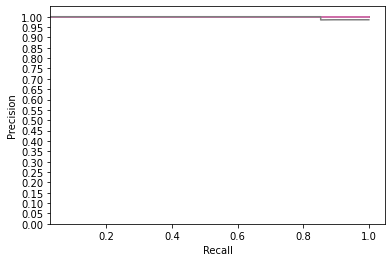

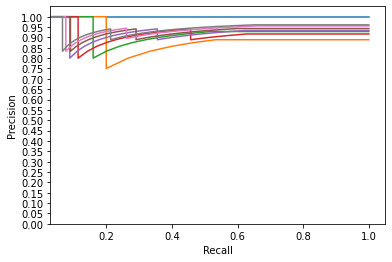

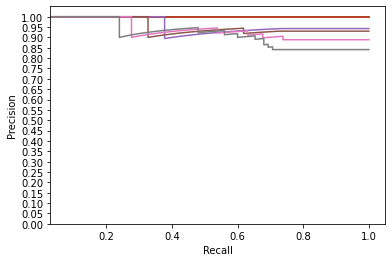

In [13]:
for title, scores in total_scores:
    for precision, recall in normalize_samples(scores, total_pages):
        plot_recall_precision(recall, precision)
    plt.show()

#### I grafici sono la media dei valori dei grafici di sopra al variare dell'input

Si valutano quindi le prestazioni medie a variare dell'input

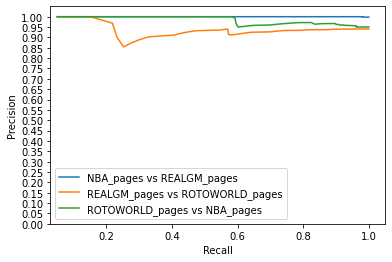

In [14]:
for title, scores in total_scores:
    average_precision, average_recall = average_score(normalize_samples(scores, total_pages))
    plot_recall_precision(average_recall, average_precision, title)

plt.legend()

# In base alla grandezza dell'input avrò valori differenti

A differenza di prima qui non si fa una media nella dimensione dell'input.

Invece si prendono i valori migliori in base alla grandezza dell'input

In [31]:
import time
epsilon = 1e-3

def get_measures(site_a, site_b):
    input_size = 2
    f1_measures = []
    precisions = []
    recalls = []
    inputs = []
    times = []

    for input_size in range(5, 75 + 1, 5):
        start_time = time.time()
        precision, recall = tf_idf.entity_linkage(target, site_a, site_b, input_size)
        end_time = time.time()
        precision = np.array(precision)
        recall = np.array(recall)
        f1_measure = 2 * precision * recall / (precision + recall + epsilon)
        best_f1_measure_index = np.argmax(f1_measure)
        best_precision = precision[best_f1_measure_index]
        best_recall = recall[best_f1_measure_index]
        best_f1 = f1_measure[best_f1_measure_index]
        f1_measures.append(best_f1)
        precisions.append(best_precision)
        recalls.append(best_recall)
        inputs.append(input_size)
        times.append(end_time - start_time)
        
    return inputs, precisions, recalls, f1_measures, times
    

In [32]:
total_inputs = []
total_precisions = []
total_recalls = []
total_f1_measures = []
total_times = []

for site_a, site_b in sites:
    title = site_a + " vs " + site_b
    inputs, precisions, recalls, f1_measures, times = get_measures(site_a, site_b)
    total_inputs.append(inputs)
    total_precisions.append( (title, precisions) )
    total_recalls.append( (title, recalls) )
    total_f1_measures.append( (title, f1_measures) )
    total_times.append((title, times))

pages: 5
pages: 10
pages: 15
pages: 20
pages: 25
pages: 30
pages: 35
pages: 40
pages: 45
pages: 50
pages: 55
pages: 60
pages: 65
pages: 70
pages: 75
pages: 5
pages: 10
pages: 15
pages: 20
pages: 25
pages: 30
pages: 35
pages: 40
pages: 45
pages: 50
pages: 55
pages: 60
pages: 65
pages: 70
pages: 75
pages: 5
pages: 10
pages: 15
pages: 20
pages: 25
pages: 30
pages: 35
pages: 40
pages: 45
pages: 50
pages: 55
pages: 60
pages: 65
pages: 70
pages: 75


In [147]:
def plot_feature_on_input_size(feature, input_size, feature_name, title, max_y = 1.0):
    plt.plot(input_size, feature, label=title)
    plt.xlabel("Input size")
    plt.ylabel(feature_name)
    
    feature = np.array(feature)
    arg_max = np.argmax(feature)
    
    plt.axis([input_size[0], input_size[-1], 0, max_y * 1.04])
    if max_y <= 1:
        max_y = max_y * 21
        ticks = [ i/20 for i in range(round(max_y))]
    else:
        ticks = [ i for i in range(round(max_y*1.2))]
    plt.yticks(ticks)
    plt.xticks(input_size)

In [148]:
def plot_different_input_sizes(total_measures, measure_title):
    max_y_value = 0
    for legend, measures in total_measures:
        max_y_value = max(max_y_value, max(measures))
        plot_feature_on_input_size(measures, inputs, measure_title, legend, max_y_value)

    plt.legend()

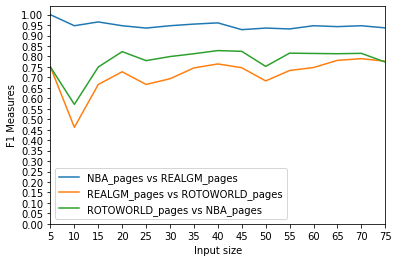

In [149]:
plot_different_input_sizes(total_f1_measures, "F1 Measures")
plt.savefig("plots/f1-on-input-size.png")

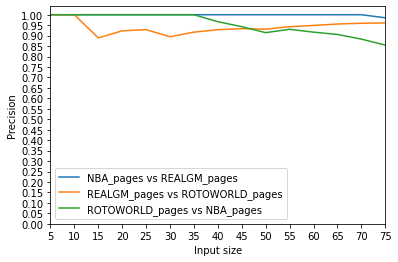

In [150]:
plot_different_input_sizes(total_precisions, "Precision")
plt.savefig("plots/precision-on-input-size.png")

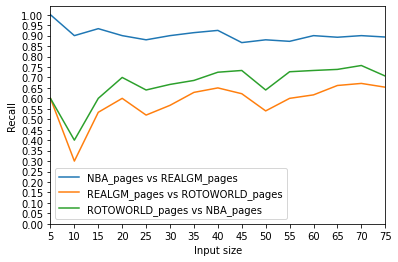

In [151]:
plot_different_input_sizes(total_recalls, "Recall")
plt.savefig("plots/recall-on-input-size.png")

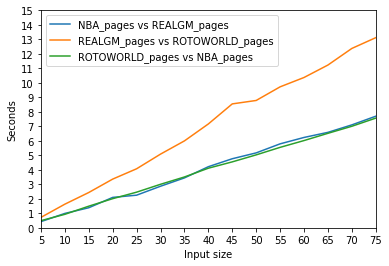

In [152]:
plot_different_input_sizes(total_times, "Seconds")
plt.savefig("plots/time-on-input-size.png")